<a href="https://colab.research.google.com/github/mokranerachedi/cell-phone-store-sales-analysis/blob/main/cell-phone-store-sales-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Analysis Of A Cell Phone Store**

### **Problem Statement** 
Analyse the monthly sales data of a smartphone and gadget store and answer the following questions :

- In which month did we achieve the highest turnover ?
- In which city did we receive the most orders ?
- When should we run an advertising campaign to increase sales ?
- Which product sells the most ?
- Which product combinations sell the most?

## **Import the data**

In [144]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# Merge sales files
df = pd.concat(
    map(pd.read_csv, [
                      'Sales_January_2019.csv', 
                      'Sales_February_2019.csv',
                      'Sales_March_2019.csv',
                      'Sales_April_2019.csv',
                      'Sales_May_2019.csv',
                      'Sales_June_2019.csv',
                      'Sales_July_2019.csv',
                      'Sales_August_2019.csv',
                      'Sales_September_2019.csv',
                      'Sales_October_2019.csv',
                      'Sales_November_2019.csv',
                      'Sales_December_2019.csv'
                      ]
        ), ignore_index=True)
print(df)

       Order ID  ...                        Purchase Address
0        141234  ...         944 Walnut St, Boston, MA 02215
1        141235  ...        185 Maple St, Portland, OR 97035
2        141236  ...   538 Adams St, San Francisco, CA 94016
3        141237  ...      738 10th St, Los Angeles, CA 90001
4        141238  ...           387 10th St, Austin, TX 73301
...         ...  ...                                     ...
186845   319666  ...  14 Madison St, San Francisco, CA 94016
186846   319667  ...    549 Willow St, Los Angeles, CA 90001
186847   319668  ...        273 Wilson St, Seattle, WA 98101
186848   319669  ...          778 River St, Dallas, TX 75001
186849   319670  ...  747 Chestnut St, Los Angeles, CA 90001

[186850 rows x 6 columns]


## **Discover the data**

In [146]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [147]:
# The shape of the dataframe
df.shape

(186850, 6)

In [148]:
# Types of the data
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [149]:
# Informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [150]:
# See missing values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [151]:
# Delete missing values
df = df.dropna(how='all')

In [152]:
df.shape

(186305, 6)

## **Question 1 : In which month did we achieve the highest turnover ?**

first, we have to extract the month from *'Order Date'*.

In [153]:
def month(x):
    """Function to extract the month from a date"""
    return x.split('/')[0]

In [154]:
# Create a new variable that will contain the month of the order date
df['Month'] = df['Order Date'].apply(month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [155]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [156]:
# See months
df['Month'].unique()

array(['01', 'Order Date', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12'], dtype=object)

In [157]:
df = df[df['Month'] != 'Order Date']
df['Month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [158]:
 # Cast the dtypes of columns in the dataframe
df['Month'] = df['Month'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [159]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [160]:
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


Now, we have to find the month with the best turnover.

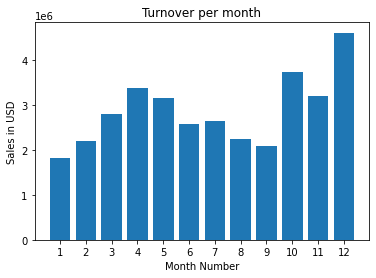

In [162]:
months = range(1, 13)

plt.bar(months, df.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')
plt.title('Turnover per month')
plt.show()

**The month with the best turnover is month 12, i.e. December.**

## **Question 2: In which city did we receive the most orders ?**

Fisrt, we have to extract the city from *'Purchase Address'*.

In [163]:
def city(x):
    """Function to extract city from address"""
    return x.split(',')[1].strip()

In [164]:
# Create a new column that will contain city
df['City'] = df['Purchase Address'].apply(city)

In [165]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [166]:
df['City'].unique()

array(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'], dtype=object)

In [167]:
groupby_city = df.groupby('City')['City'].count()
groupby_city

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: City, dtype: int64

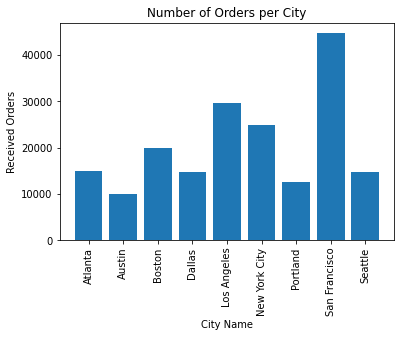

In [168]:
plt.bar(groupby_city.index, groupby_city)
plt.xticks(rotation="vertical")
plt.ylabel('Received Orders')
plt.xlabel('City Name')
plt.title('Number of Orders per City')
plt.show()

**The city that received the most orders is San Francisco and the city with the lowest number of orders is Austin.**

## **Question 3 : When should we run an advertising campaign to increase sales ?**

Here, we want to know when to run an advertising campaign to get more sales. So, we have to extract the hour from *'Order Date'*

In [169]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour

In [170]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [171]:
groupby_hour = df.groupby('Hour')['Sales'].count()
groupby_hour

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

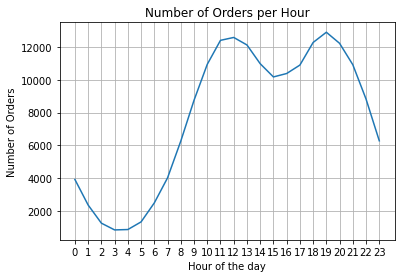

In [172]:
hours = range(0, 24)
plt.grid()
plt.plot(hours, groupby_hour)
plt.xticks(hours)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour')
plt.show()

**The best time to launch an advertising campaign is either 12:00 or 19:00, which correspond to the time of the lunch break and the time when people finish work respectively.**

## **Question 4 : Which product sells the most ?**

In this section, we will look at which product sells the most and why ?

In [173]:
groupby_product_quantity =  df.groupby('Product')['Quantity Ordered'].sum()
groupby_product_quantity

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

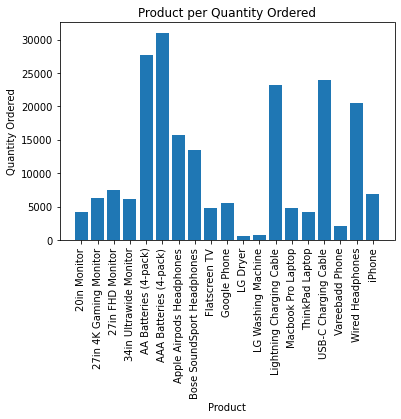

In [174]:
plt.bar(groupby_product_quantity.index, groupby_product_quantity)
plt.xticks(rotation="vertical")
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Product per Quantity Ordered')
plt.show()

The best selling product is ***AAA Batteries (4-PACK)*** and the least sold product is ***LG Dryer***.

Next, we will see the impact of the price on the sale of the product.

In [175]:
groupby_product_price = df.groupby('Product')['Price Each'].mean()
groupby_product_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [176]:
products = groupby_product_quantity.index
quantity = groupby_product_quantity
prices = groupby_product_price

<Figure size 1440x720 with 0 Axes>

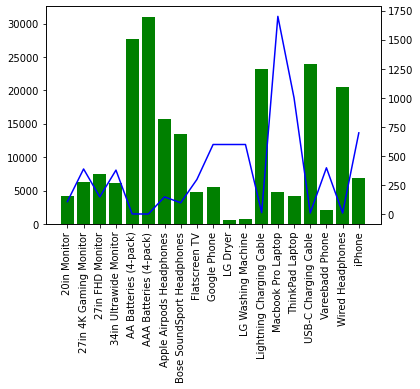

In [177]:
plt.figure(figsize=(20, 10))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation="vertical")
plt.show()

**It can be seen that the products that are sold the most are those with low prices.**

## **Conclusion**

In this project, we analysed sales data from a cell phone store. This allowed us to extract the following information :

- The month with the best turnover is ***December***.
- The city that received the most orders is ***San Francisco*** and the city with the lowest number of orders is ***Austin***.
- The best time to launch an advertising campaign is either ***12:00*** or ***19:00***, which correspond to the time of the lunch break and the time when people finish work respectively.
- The best selling product is ***AAA Batteries (4-PACK)*** and the least sold product is ***LG Dryer***.
- The products that are sold the most are those with low prices.